## Data Load

In [42]:
import pandas as pd

In [43]:
df = pd.read_csv('train.csv')
df

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요.",2.2,0.0
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",4.2,1.0
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약조건 변경해주세요.,주택청약 무주택기준 변경해주세요.,2.4,0.0
3,boostcamp-sts-v1-train-003,slack-sampled,입사후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!,0.0,0.0
...,...,...,...,...,...,...
9319,boostcamp-sts-v1-train-9319,petition-sampled,교원능력개발평가에서 교원이 보호받을 수 있는 장치를 마련해야합니다,본인이 납부한 국민연금 금액을 기준으로 대출을 받을 수 있는 제도를 마련해 주세요,0.2,0.0
9320,boostcamp-sts-v1-train-9320,petition-sampled,여성가족부의 폐지를 원합니드,여성가족부 폐지를 청원 합니다.,4.2,1.0
9321,boostcamp-sts-v1-train-9321,petition-sampled,국회의원들 월급좀 줄여주세요,공무원 봉급좀 줄이지좀 마세요,0.6,0.0
9322,boostcamp-sts-v1-train-9322,slack-sampled,오늘 못한 점심은 다음에 다시 츄라이 하기로 해요!!,오늘 못먹은 밥은 꼭 담에 먹기로 하고요!!,3.2,1.0


### Label이 0.0인 데이터 확인

In [44]:
df_0 = df[df['label'] == 0.0]
print(len(df_0))
print(df_0.head())

2119
                            id            source  \
4   boostcamp-sts-v1-train-004     slack-sampled   
14  boostcamp-sts-v1-train-014     slack-sampled   
19  boostcamp-sts-v1-train-019  petition-sampled   
20  boostcamp-sts-v1-train-020     slack-sampled   
22  boostcamp-sts-v1-train-022     slack-sampled   

                         sentence_1                        sentence_2  label  \
4                        뿌듯뿌듯 하네요!!             꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!    0.0   
14  아래는 게임 내에서 함께 팀을 맺고 캡쳐한 이미지입니다.  여러분들간의 다양한 아이디어를 제안하고 나누는 채널입니다.    0.0   
19           내년 러시아월드컵 자진포기 청원드립니다.       2023 아시안컵 유치에 공동개최를 반대 합니다.    0.0   
20                 앞머리 새로 하셨습니다. ^^          가방에 넣어 다니면서 조금씩 먹습니다. ^^    0.0   
22           답답할 때 보면 속이 뻥 뚫릴 것 같아요      양보단 한입 먹는 순간 고삐 풀릴 것 같아요 ㅋㅋㅋ    0.0   

    binary-label  
4            0.0  
14           0.0  
19           0.0  
20           0.0  
22           0.0  


## Down sampling - 1000 data

### token 수가 3개 이상인 문장 선별
뽑은 문장을 augmentation하려면 의미가 어느정도 있는 문장(tokens_len>=3)이어야 한다고 판단

In [45]:
df_filtered = df_0[
    (df_0['sentence_1'].apply(lambda x: len(x.split())) >= 3) & 
    (df_0['sentence_2'].apply(lambda x: len(x.split())) >= 3)
]

print(len(df_filtered))
print(df_filtered.head())

1696
                            id            source  \
14  boostcamp-sts-v1-train-014     slack-sampled   
19  boostcamp-sts-v1-train-019  petition-sampled   
20  boostcamp-sts-v1-train-020     slack-sampled   
22  boostcamp-sts-v1-train-022     slack-sampled   
23  boostcamp-sts-v1-train-023      nsmc-sampled   

                              sentence_1                        sentence_2  \
14       아래는 게임 내에서 함께 팀을 맺고 캡쳐한 이미지입니다.  여러분들간의 다양한 아이디어를 제안하고 나누는 채널입니다.   
19                내년 러시아월드컵 자진포기 청원드립니다.       2023 아시안컵 유치에 공동개최를 반대 합니다.   
20                      앞머리 새로 하셨습니다. ^^          가방에 넣어 다니면서 조금씩 먹습니다. ^^   
22                답답할 때 보면 속이 뻥 뚫릴 것 같아요      양보단 한입 먹는 순간 고삐 풀릴 것 같아요 ㅋㅋㅋ   
23  노래와 잘 어우러지는 영상 덕분인지 짧지만 강한 인상이 남네요..           조금유치하지만 가볍게 볼수는 있는영화네요!   

    label  binary-label  
14    0.0           0.0  
19    0.0           0.0  
20    0.0           0.0  
22    0.0           0.0  
23    0.0           0.0  


### Data Filtering
1. filtered 문장 전체 augmentation 진행 (filtered: label이 0.0이면서 tokens_len>=3)
2. 문장 변화 없는 데이터셋 제외할 것

- filtered 문장 전체 augmentation 진행

In [46]:
from BERT_augmentation import BERT_Augmentation

BERT_aug = BERT_Augmentation()
random_masking_insertion = BERT_aug.random_masking_insertion

/Users/suvin/.pyenv/versions/3.12.4/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [47]:
df_filtered['sentence_1_bert'] = df_filtered['sentence_1'].apply(lambda x: random_masking_insertion(x))
df_filtered['sentence_2_bert'] = df_filtered['sentence_2'].apply(lambda x: random_masking_insertion(x))
print(df_filtered.head())

/var/folders/ln/gwgfj86n79l8sgq9_b4m1fpc0000gn/T/ipykernel_8920/2557564840.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['sentence_1_bert'] = df_filtered['sentence_1'].apply(lambda x: random_masking_insertion(x))


                            id            source  \
14  boostcamp-sts-v1-train-014     slack-sampled   
19  boostcamp-sts-v1-train-019  petition-sampled   
20  boostcamp-sts-v1-train-020     slack-sampled   
22  boostcamp-sts-v1-train-022     slack-sampled   
23  boostcamp-sts-v1-train-023      nsmc-sampled   

                              sentence_1                        sentence_2  \
14       아래는 게임 내에서 함께 팀을 맺고 캡쳐한 이미지입니다.  여러분들간의 다양한 아이디어를 제안하고 나누는 채널입니다.   
19                내년 러시아월드컵 자진포기 청원드립니다.       2023 아시안컵 유치에 공동개최를 반대 합니다.   
20                      앞머리 새로 하셨습니다. ^^          가방에 넣어 다니면서 조금씩 먹습니다. ^^   
22                답답할 때 보면 속이 뻥 뚫릴 것 같아요      양보단 한입 먹는 순간 고삐 풀릴 것 같아요 ㅋㅋㅋ   
23  노래와 잘 어우러지는 영상 덕분인지 짧지만 강한 인상이 남네요..           조금유치하지만 가볍게 볼수는 있는영화네요!   

    label  binary-label                         sentence_1_bert  \
14    0.0           0.0      아래는 모두 게임 내에서 함께 팀을 맺고 캡쳐한 이미지입니다.   
19    0.0           0.0                - 내년 러시아월드컵 자진포기 청원드립니다.   
20    0.0        

/var/folders/ln/gwgfj86n79l8sgq9_b4m1fpc0000gn/T/ipykernel_8920/2557564840.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['sentence_2_bert'] = df_filtered['sentence_2'].apply(lambda x: random_masking_insertion(x))


- 문장 변화 없는 데이터셋 제외

In [48]:
group_1 = df_filtered[df_filtered['sentence_1'] != df_filtered['sentence_1_bert']]
group_1 = group_1[['sentence_1', 'sentence_1_bert']]
group_1 = pd.DataFrame(group_1)
group_1.to_csv('group_1.csv') # index=False
group_1

,sentence_1,sentence_1_bert
14,아래는 게임 내에서 함께 팀을 맺고 캡쳐한 이미지입니다.,아래는 모두 게임 내에서 함께 팀을 맺고 캡쳐한 이미지입니다.
19,내년 러시아월드컵 자진포기 청원드립니다.,- 내년 러시아월드컵 자진포기 청원드립니다.
20,앞머리 새로 하셨습니다. ^^,앞머리 새로 발견 하셨습니다. ^ ^
22,답답할 때 보면 속이 뻥 뚫릴 것 같아요,답답할 때 보면 정말 속이 뻥 뚫릴 것 같아요
23,노래와 잘 어우러지는 영상 덕분인지 짧지만 강한 인상이 남네요..,노래와 잘 어우러지는 이 영상 덕분인지 짧지만 강한 인상이 남네요..
...,...,...
9229,사위가 장모한테 반말을 예의도없고 배운것도 없나요?,사위가 장모한테 반말을 예의도없고 배운것도 별로 없나요?
9237,다음에는 하와이서 보는걸로? ㅋㅋ,그럼 다음에는 하와이서 보는걸로? ㅋㅋ
9250,형광도료를 써서 안전하게 잘 보일 수 있도록 도와주세요.,형광도료를 써서 더 안전하게 잘 보일 수 있도록 도와주세요.
9266,국민연금 .. 어려운이들에게는 희망이될수있게 자율해지를..,국민연금.. 어려운이들에게는. 희망이될수있게 자율해지를..


In [49]:
group_2 = df_filtered[df_filtered['sentence_2'] != df_filtered['sentence_2_bert']]
group_2 = group_2[['sentence_2', 'sentence_2_bert']]
group_2 = pd.DataFrame(group_2)
group_2.to_csv('group_2.csv') # index=False
group_2

,sentence_2,sentence_2_bert
14,여러분들간의 다양한 아이디어를 제안하고 나누는 채널입니다.,여러분들간의 다양한 아이디어를 제안하고 함께 나누는 채널입니다.
19,2023 아시안컵 유치에 공동개최를 반대 합니다.,2023 아시안컵 유치에 공동개최를 강력히 반대 합니다.
20,가방에 넣어 다니면서 조금씩 먹습니다. ^^,가방에 넣어 다니면서 이것저것 조금씩 먹습니다. ^ ^
22,양보단 한입 먹는 순간 고삐 풀릴 것 같아요 ㅋㅋㅋ,양보단 한입 먹는 순간 고삐가 풀릴 것 같아요 ㅋㅋㅋ
23,조금유치하지만 가볍게 볼수는 있는영화네요!,조금유치하지만 가볍게도 볼수는 있는영화네요!
...,...,...
9254,나라가 망해가고있는걸 젊은 24살 청년 또한 느끼고있는건.....,점점 나라가 망해가고있는걸 젊은 24살 청년 또한 느끼고있는건.....
9262,국민을 살릴려면 관광산업을 키워주세요.,국민을 살릴려면 관광산업을 더 키워주세요.
9266,"병원비 이천만원, 남은건 집 뿐인데 팔릴수 있게 도와주세요","병원비 이천만원, 남은건 집값 뿐인데 팔릴수 있게 도와주세요"
9274,대만박스오피스 1위 대만 클라스 보소 -_-;;,"대만박스오피스 1위, 대만 클라스 보소 - _ - ; ;"


- sentence_1과 sentence_2 모두 변형된 index만 고려

In [50]:
common_index = group_1.index.intersection(group_2.index)
group_1_common = group_1.loc[common_index]
group_2_common = group_2.loc[common_index]

In [51]:
group_1_common

,sentence_1,sentence_1_bert
14,아래는 게임 내에서 함께 팀을 맺고 캡쳐한 이미지입니다.,아래는 모두 게임 내에서 함께 팀을 맺고 캡쳐한 이미지입니다.
19,내년 러시아월드컵 자진포기 청원드립니다.,- 내년 러시아월드컵 자진포기 청원드립니다.
20,앞머리 새로 하셨습니다. ^^,앞머리 새로 발견 하셨습니다. ^ ^
22,답답할 때 보면 속이 뻥 뚫릴 것 같아요,답답할 때 보면 정말 속이 뻥 뚫릴 것 같아요
23,노래와 잘 어우러지는 영상 덕분인지 짧지만 강한 인상이 남네요..,노래와 잘 어우러지는 이 영상 덕분인지 짧지만 강한 인상이 남네요..
...,...,...
9229,사위가 장모한테 반말을 예의도없고 배운것도 없나요?,사위가 장모한테 반말을 예의도없고 배운것도 별로 없나요?
9237,다음에는 하와이서 보는걸로? ㅋㅋ,그럼 다음에는 하와이서 보는걸로? ㅋㅋ
9250,형광도료를 써서 안전하게 잘 보일 수 있도록 도와주세요.,형광도료를 써서 더 안전하게 잘 보일 수 있도록 도와주세요.
9266,국민연금 .. 어려운이들에게는 희망이될수있게 자율해지를..,국민연금.. 어려운이들에게는. 희망이될수있게 자율해지를..


In [52]:
group_2_common

,sentence_2,sentence_2_bert
14,여러분들간의 다양한 아이디어를 제안하고 나누는 채널입니다.,여러분들간의 다양한 아이디어를 제안하고 함께 나누는 채널입니다.
19,2023 아시안컵 유치에 공동개최를 반대 합니다.,2023 아시안컵 유치에 공동개최를 강력히 반대 합니다.
20,가방에 넣어 다니면서 조금씩 먹습니다. ^^,가방에 넣어 다니면서 이것저것 조금씩 먹습니다. ^ ^
22,양보단 한입 먹는 순간 고삐 풀릴 것 같아요 ㅋㅋㅋ,양보단 한입 먹는 순간 고삐가 풀릴 것 같아요 ㅋㅋㅋ
23,조금유치하지만 가볍게 볼수는 있는영화네요!,조금유치하지만 가볍게도 볼수는 있는영화네요!
...,...,...
9229,과연 귀신영화는 미국인한테 어울릴까요?,과연 이 귀신영화는 미국인한테 어울릴까요?
9237,ㅋㅋ 제가 멀리 나온걸로!,ㅋㅋ 제가 저 멀리 나온걸로!
9250,우리 각자의 인권을 찾을 수 있도록 참여해주세요,우리 각자의 인권을 찾을 수 있도록 적극 참여해주세요
9266,"병원비 이천만원, 남은건 집 뿐인데 팔릴수 있게 도와주세요","병원비 이천만원, 남은건 집값 뿐인데 팔릴수 있게 도와주세요"


In [53]:
group_1_common = group_1_common.rename(columns={
    'sentence_1': 'sentence_1',
    'sentence_1_bert': 'sentence_2'
})
group_2_common = group_2_common.rename(columns={
    'sentence_2': 'sentence_1',
    'sentence_2_bert': 'sentence_2'
})

### sentence_1을 기준으로 유사도가 높은 상위 1000개 문장 선별
1. 코사인 유사도 계산 함수 정의
2. sentence와 sentence_bert 열 간의 코사인 유사도가 높은 상위 1000개의 행을 추출

- cosine similarity 계산 함수 정의

In [54]:
# Load model directly
from transformers import AutoTokenizer, AutoModel

tokenizer = AutoTokenizer.from_pretrained("jhgan/ko-sbert-nli")
model = AutoModel.from_pretrained("jhgan/ko-sbert-nli")

/Users/suvin/.pyenv/versions/3.12.4/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [55]:
import torch

def get_emb(sentences):
#Mean Pooling - Take attention mask into account for correct averaging
  def mean_pooling(model_output, attention_mask):
      token_embeddings = model_output[0] #First element of model_output contains all token embeddings
      input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
      return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)

  # Load model from HuggingFace Hub
  tokenizer = AutoTokenizer.from_pretrained('jhgan/ko-sbert-nli')
  model = AutoModel.from_pretrained('jhgan/ko-sbert-nli')

  sen1 = []
  sen2 = []
  # Tokenize sentences
  for sentence in sentences:
    encoded_input = tokenizer(sentence, padding=True, truncation=True, return_tensors='pt')

    # Compute token embeddings
    with torch.no_grad():
        model_output = model(**encoded_input)

    # Perform pooling. In this case, mean pooling.
    sentence_embeddings = mean_pooling(model_output, encoded_input['attention_mask'])
    sen1.append(sentence_embeddings[0])
    sen2.append(sentence_embeddings[1])
  return sen1, sen2

In [56]:
def cos_sim(sen1, sen2):
  ans = []
  for a, b in zip(sen1, sen2):
    ans.append((torch.dot(a, b) / (torch.norm(a)*torch.norm(b))).item())
  return ans

- group_1_common에서 sentence와 sentence_bert 열 간의 코사인 유사도가 높은 상위 1000개의 행을 추출

In [57]:
sentences = list(zip(group_1_common['sentence_1'], group_1_common['sentence_2']))
sen1, sen2 = get_emb(sentences)
group_1_common['cos_sim'] = cos_sim(sen1, sen2)

In [58]:
group_1_common = group_1_common.sort_values(by='cos_sim', ascending=False)
group_1_common

,sentence_1,sentence_2,cos_sim
8279,가능함... 가능하겠지... 가능할거야... 바보가 아닌 이상.,가능함... 가능하겠지.... 가능할거야... 바보가 아닌 이상.,0.999396
4601,지지율이 40% 대라고 ?? 믿을수없다!!,지지율이 40 % 대라고??? 믿을수없다!!,0.998864
3605,청갤 실명제로 어그로끄는 종자들을 적폐로 규정해주시고 무분별한 비판을 허용해주세요,"청갤 실명제로 어그로끄는 종자들을 적폐로 규정해주시고, 무분별한 비판을 허용해주세요",0.998849
1642,수능연기를 하되 수능고사장으로 지정된 학교는 일주일 휴교령을 내려주시기 바랍니다.,수능연기를 하되 수능고사장으로 지정된 학교는 일주일 휴교령을 내려주시기를 바랍니다.,0.998761
1505,우리가 어떤 세상에 살고 있는지... 불편한 진실.,우리가 어떤 세상에 살고 있는지.... 불편한 진실.,0.998693
...,...,...,...
8086,70세 이상도 기초연금 주세요,70세 이상도 아닌 기초연금 주세요,0.796387
4057,작가는 가난을 먹고 살지 않습니다.,작가는 결코 가난을 먹고 살지 않습니다.,0.775431
466,애들은 용에 환장할 듯,애들은 사냥 용에 환장할 듯,0.765792
5638,저는 사실 우리 중에 제일 좋은 홈가드닝 환경 가지고 계시는 얘기가 제일 기대되는 ㅎㅎ,저는 사실 우리 중에 제일 안 좋은 그런 홈가드닝 환경 가지고 계시는 얘기가 제일 ...,0.753312


In [59]:
top_1000_1 = group_1_common.iloc[:1000]
top_1000_1

,sentence_1,sentence_2,cos_sim
8279,가능함... 가능하겠지... 가능할거야... 바보가 아닌 이상.,가능함... 가능하겠지.... 가능할거야... 바보가 아닌 이상.,0.999396
4601,지지율이 40% 대라고 ?? 믿을수없다!!,지지율이 40 % 대라고??? 믿을수없다!!,0.998864
3605,청갤 실명제로 어그로끄는 종자들을 적폐로 규정해주시고 무분별한 비판을 허용해주세요,"청갤 실명제로 어그로끄는 종자들을 적폐로 규정해주시고, 무분별한 비판을 허용해주세요",0.998849
1642,수능연기를 하되 수능고사장으로 지정된 학교는 일주일 휴교령을 내려주시기 바랍니다.,수능연기를 하되 수능고사장으로 지정된 학교는 일주일 휴교령을 내려주시기를 바랍니다.,0.998761
1505,우리가 어떤 세상에 살고 있는지... 불편한 진실.,우리가 어떤 세상에 살고 있는지.... 불편한 진실.,0.998693
...,...,...,...
212,시대를 타지 않는 명작...셰익스피어 원작 그자체,시대를 타지 않는 한 명작... 셰익스피어 원작 그자체,0.960833
1517,공유가 필요하신 페이지 링크 공유주실 수 있을까요?,공유가 필요하신 페이지 링크 공유주실 알 수 있을까요?,0.960741
7036,진짜 빨리 써주셨네요 ㅎㅎ,진짜 너무 빨리 써주셨네요 ㅎㅎ,0.960638
2825,이정도면 잘 만들어진 속편,이정도면 잘 만들어진다 속편,0.960484


- group_2_common에서 group_1_common에 있는 인덱스만 남김

In [60]:
group_2_common = group_2_common[group_2_common.index.isin(top_1000_1.index)]
group_2_common

,sentence_1,sentence_2
19,2023 아시안컵 유치에 공동개최를 반대 합니다.,2023 아시안컵 유치에 공동개최를 강력히 반대 합니다.
22,양보단 한입 먹는 순간 고삐 풀릴 것 같아요 ㅋㅋㅋ,양보단 한입 먹는 순간 고삐가 풀릴 것 같아요 ㅋㅋㅋ
23,조금유치하지만 가볍게 볼수는 있는영화네요!,조금유치하지만 가볍게도 볼수는 있는영화네요!
46,저는 사과나 우유에 프로틴타서 먹어요 ㅎㅎ,저는 사과나 우유에만 프로틴타서 먹어요 ㅎㅎ
54,여성가족부 폐지하고 그 예산을 좀 더 올바르게 사용했으면 좋겠습니다.,여성가족부 폐지하고 그 예산을 좀 더 올바르게 잘 사용했으면 좋겠습니다.
...,...,...
9229,과연 귀신영화는 미국인한테 어울릴까요?,과연 이 귀신영화는 미국인한테 어울릴까요?
9237,ㅋㅋ 제가 멀리 나온걸로!,ㅋㅋ 제가 저 멀리 나온걸로!
9250,우리 각자의 인권을 찾을 수 있도록 참여해주세요,우리 각자의 인권을 찾을 수 있도록 적극 참여해주세요
9266,"병원비 이천만원, 남은건 집 뿐인데 팔릴수 있게 도와주세요","병원비 이천만원, 남은건 집값 뿐인데 팔릴수 있게 도와주세요"


In [61]:
sentences = list(zip(group_2_common['sentence_1'], group_2_common['sentence_2']))
sen1, sen2 = get_emb(sentences)
group_2_common['cos_sim'] = cos_sim(sen1, sen2)

/Users/suvin/.pyenv/versions/3.12.4/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [62]:
top_1000_2 = group_2_common.sort_values(by='cos_sim', ascending=False).iloc[:977]
top_1000_2

,sentence_1,sentence_2,cos_sim
4899,팔 언제 뺄 수 있나요 ㅋㅋ,팔 언제 뺄릴 수 있나요 ㅋㅋ,1.000000
3149,아 뻔한 스토리 ......ㅡ..ㅡ,아 뻔한 스토리....... ㅡ.. ㅡ,0.999486
2947,한국자산관리공사에 근무하는 사람들의 특권의식을 없애는 제도적 장치를 마련해주시기 바랍니다,한국자산관리공사에 근무하는 사람들의 특권의식을 없애는 제도적인 장치를 마련해주시기 ...,0.999481
2945,150만원 이하 통장압류 금지법 ... 빨리 만들어주세요 ...,150만원 이하 통장압류 금지법... 빨리 만들어주세요....,0.999343
1118,넘나 좋았던 제주도 비양도 캠핑... 크억.. 사진보니 너무 땡기네요ㅎㅎ,넘나 좋았던 제주도 비양도 캠핑... 크억... 사진보니 너무 땡기네요ㅎㅎ,0.999253
...,...,...,...
5452,개 이하가 없어서 정말 안타깝습니다.,개 이하가 거의 없어서 정말 안타깝습니다.,0.898096
4789,군병원 폐지하고 민간병원에 위탁합시다.,군병원 폐지하고 민간병원에만 위탁합시다.,0.897230
5744,오 신기 이런게 있군요,오 신기 이런게 다 있군요,0.897179
1965,그 모태가 되는게 언리더십이었군요!,그 모태가 하나 되는게 언리더십이었군요!,0.896549


### Down Sampling
위 1000개의 데이터셋에 해당하는 index는 0.0 label에서 cut

In [78]:
dataset = df[~df.index.isin(top_1000_1.index)]
dataset = pd.DataFrame(dataset)
dataset.to_csv('downsampling_only.csv')
dataset

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요.",2.2,0.0
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",4.2,1.0
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약조건 변경해주세요.,주택청약 무주택기준 변경해주세요.,2.4,0.0
3,boostcamp-sts-v1-train-003,slack-sampled,입사후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!,0.0,0.0
...,...,...,...,...,...,...
9319,boostcamp-sts-v1-train-9319,petition-sampled,교원능력개발평가에서 교원이 보호받을 수 있는 장치를 마련해야합니다,본인이 납부한 국민연금 금액을 기준으로 대출을 받을 수 있는 제도를 마련해 주세요,0.2,0.0
9320,boostcamp-sts-v1-train-9320,petition-sampled,여성가족부의 폐지를 원합니드,여성가족부 폐지를 청원 합니다.,4.2,1.0
9321,boostcamp-sts-v1-train-9321,petition-sampled,국회의원들 월급좀 줄여주세요,공무원 봉급좀 줄이지좀 마세요,0.6,0.0
9322,boostcamp-sts-v1-train-9322,slack-sampled,오늘 못한 점심은 다음에 다시 츄라이 하기로 해요!!,오늘 못먹은 밥은 꼭 담에 먹기로 하고요!!,3.2,1.0


## Data Augmentation

### 데이터 할당
- label = 5.0에 같다시피한 데이터 286개 할당
- label = 4.8에 top_1000_1 데이터 500, top_1000_2 데이터 500까지 할당
- label = 4.6에 top_1000_1 데이터 650, top_1000_2 데이터 650까지 할당
- label = 4.5에 top_1000_1 데이터 850, top_1000_2 데이터 850까지 할당
- label = 4.4에 top_1000_1 데이터 925, top_1000_2 데이터 925까지 할당
- label = 4.2에 top_1000_1 데이터 999, top_1000_2 데이터 999까지 할당

### label = 5.0인 데이터셋 따로 고려
label이 5점인 데이터셋은 큰 차이가 없어야 한다고 판단

In [64]:
import re
import unicodedata

def preprocess_text(text):
    # 소문자로 변환
    text = text.lower()
    # 한글, 영어, 공백을 제외한 모든 문자 제거
    text = re.sub(r'[^가-힣a-zA-Z\s]', '', text)
    # 공백 제거
    text = ''.join(text.split())

    return text

def compare_sentences(sentence1, sentence2):
    preprocessed_sentence1 = preprocess_text(sentence1)
    preprocessed_sentence2 = preprocess_text(sentence2)
    
    return preprocessed_sentence1 == preprocessed_sentence2

# 예시
sentence1 = "잔잔한 감동으로 다가온 영화,"
sentence2 = "잔잔한 감동으로 다가온영화"

result = compare_sentences(sentence1, sentence2)
print(result)  # True 또는 False

True


In [65]:
top_1000_1['are_equal'] = top_1000_1.apply(lambda row: compare_sentences(row['sentence_1'], row['sentence_2']), axis=1)
equal_1 = top_1000_1[top_1000_1['are_equal']]
equal_1

/var/folders/ln/gwgfj86n79l8sgq9_b4m1fpc0000gn/T/ipykernel_8920/789954438.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_1000_1['are_equal'] = top_1000_1.apply(lambda row: compare_sentences(row['sentence_1'], row['sentence_2']), axis=1)


,sentence_1,sentence_2,cos_sim,are_equal
8279,가능함... 가능하겠지... 가능할거야... 바보가 아닌 이상.,가능함... 가능하겠지.... 가능할거야... 바보가 아닌 이상.,0.999396,True
4601,지지율이 40% 대라고 ?? 믿을수없다!!,지지율이 40 % 대라고??? 믿을수없다!!,0.998864,True
3605,청갤 실명제로 어그로끄는 종자들을 적폐로 규정해주시고 무분별한 비판을 허용해주세요,"청갤 실명제로 어그로끄는 종자들을 적폐로 규정해주시고, 무분별한 비판을 허용해주세요",0.998849,True
1505,우리가 어떤 세상에 살고 있는지... 불편한 진실.,우리가 어떤 세상에 살고 있는지.... 불편한 진실.,0.998693,True
3916,오! 저도 요즘 다양한 요리에 도전중인데 멋져요!!,! 오! 저도 요즘 다양한 요리에 도전중인데 멋져요!!,0.998649,True
...,...,...,...,...
5904,시간이넘는닥터지바고도 거뜬히 보는 내가.,시간이넘는닥터지바고도. 거뜬히 보는 내가.,0.976432,True
214,참여연대를 위한 위원회 국민들은 없다,- 참여연대를 위한 위원회 국민들은 없다,0.975965,True
3518,이선균연기/목소리톤은 맨날 발전이 없다!,이선균연기 / 목소리톤은. 맨날 발전이 없다!,0.974383,True
2882,오토바이 전 세계 자유로 자동차 폐지 요청,"오토바이 전, 세계 자유로 자동차 폐지 요청",0.969996,True


In [66]:
top_1000_2['are_equal'] = top_1000_2.apply(lambda row: compare_sentences(row['sentence_1'], row['sentence_2']), axis=1)
equal_2 = top_1000_2[top_1000_2['are_equal']]
equal_2

,sentence_1,sentence_2,cos_sim,are_equal
3149,아 뻔한 스토리 ......ㅡ..ㅡ,아 뻔한 스토리....... ㅡ.. ㅡ,0.999486,True
2945,150만원 이하 통장압류 금지법 ... 빨리 만들어주세요 ...,150만원 이하 통장압류 금지법... 빨리 만들어주세요....,0.999343,True
1118,넘나 좋았던 제주도 비양도 캠핑... 크억.. 사진보니 너무 땡기네요ㅎㅎ,넘나 좋았던 제주도 비양도 캠핑... 크억... 사진보니 너무 땡기네요ㅎㅎ,0.999253,True
1215,크아~~ 모두 넘 즐거우셨던 것 같네요!!,크아 ~ ~ ~ 모두 넘 즐거우셨던 것 같네요!!,0.999011,True
8388,그것은 운명의 데스티니.. 바람의 윈드.. 사막의 데저트… ㅎㅎㅎ,그것은 운명의 데스티니.. 바람의 윈드.. 사막의 데저트 … … ㅎㅎㅎ,0.998968,True
...,...,...,...,...
1981,ㅊ최고의 로멘스 드라마 ㅠㅠ,ㅊ최고의 로멘스 드라마! ㅠㅠ,0.979908,True
3831,"영어 이름뒤에 ‘께’, ‘께서’와 같은 걸 붙일지 말지 입니다.","영어 이름뒤에 ‘ 께 ’, ‘ 께서 ’ 와 같은 걸 붙일지, 말지 입니다.",0.976422,True
131,(잘 어울릴 수 있어요),""" ( 잘 어울릴 수 있어요 )",0.976001,True
3668,편은유덕화 벌레무렸누데왜 안죽지그게의구심이지만 정말액션스케일은 세계최강,편은유덕화 벌레무렸누데왜 안죽지그게의구심이지만 정말액션스케일은? 세계최강,0.974552,True


In [67]:
equal = pd.concat([equal_1, equal_2], ignore_index=True)
equal

,sentence_1,sentence_2,cos_sim,are_equal
0,가능함... 가능하겠지... 가능할거야... 바보가 아닌 이상.,가능함... 가능하겠지.... 가능할거야... 바보가 아닌 이상.,0.999396,True
1,지지율이 40% 대라고 ?? 믿을수없다!!,지지율이 40 % 대라고??? 믿을수없다!!,0.998864,True
2,청갤 실명제로 어그로끄는 종자들을 적폐로 규정해주시고 무분별한 비판을 허용해주세요,"청갤 실명제로 어그로끄는 종자들을 적폐로 규정해주시고, 무분별한 비판을 허용해주세요",0.998849,True
3,우리가 어떤 세상에 살고 있는지... 불편한 진실.,우리가 어떤 세상에 살고 있는지.... 불편한 진실.,0.998693,True
4,오! 저도 요즘 다양한 요리에 도전중인데 멋져요!!,! 오! 저도 요즘 다양한 요리에 도전중인데 멋져요!!,0.998649,True
...,...,...,...,...
292,ㅊ최고의 로멘스 드라마 ㅠㅠ,ㅊ최고의 로멘스 드라마! ㅠㅠ,0.979908,True
293,"영어 이름뒤에 ‘께’, ‘께서’와 같은 걸 붙일지 말지 입니다.","영어 이름뒤에 ‘ 께 ’, ‘ 께서 ’ 와 같은 걸 붙일지, 말지 입니다.",0.976422,True
294,(잘 어울릴 수 있어요),""" ( 잘 어울릴 수 있어요 )",0.976001,True
295,편은유덕화 벌레무렸누데왜 안죽지그게의구심이지만 정말액션스케일은 세계최강,편은유덕화 벌레무렸누데왜 안죽지그게의구심이지만 정말액션스케일은? 세계최강,0.974552,True


- downsampling된 dataset label = 5.0에 추가

In [79]:
label_5 = pd.concat([dataset, equal])
label_5['label'] = 5.0
label_5['binary-label'] = 1.0
label_5

,id,source,sentence_1,sentence_2,label,binary-label,cos_sim,are_equal
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요.",5.0,1.0,NaN,NaN
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",5.0,1.0,NaN,NaN
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약조건 변경해주세요.,주택청약 무주택기준 변경해주세요.,5.0,1.0,NaN,NaN
3,boostcamp-sts-v1-train-003,slack-sampled,입사후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,5.0,1.0,NaN,NaN
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!,5.0,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...
292,NaN,NaN,ㅊ최고의 로멘스 드라마 ㅠㅠ,ㅊ최고의 로멘스 드라마! ㅠㅠ,5.0,1.0,0.979908,True
293,NaN,NaN,"영어 이름뒤에 ‘께’, ‘께서’와 같은 걸 붙일지 말지 입니다.","영어 이름뒤에 ‘ 께 ’, ‘ 께서 ’ 와 같은 걸 붙일지, 말지 입니다.",5.0,1.0,0.976422,True
294,NaN,NaN,(잘 어울릴 수 있어요),""" ( 잘 어울릴 수 있어요 )",5.0,1.0,0.976001,True
295,NaN,NaN,편은유덕화 벌레무렸누데왜 안죽지그게의구심이지만 정말액션스케일은 세계최강,편은유덕화 벌레무렸누데왜 안죽지그게의구심이지만 정말액션스케일은? 세계최강,5.0,1.0,0.974552,True


- 나머지 데이터셋은 [4.2, 5.0)에 분할 할당

In [69]:
equal_1 = top_1000_1[top_1000_1['are_equal']]
equal_1_filtered = top_1000_1[~top_1000_1.index.isin(equal_1.index)]
equal_1_filtered

,sentence_1,sentence_2,cos_sim,are_equal
1642,수능연기를 하되 수능고사장으로 지정된 학교는 일주일 휴교령을 내려주시기 바랍니다.,수능연기를 하되 수능고사장으로 지정된 학교는 일주일 휴교령을 내려주시기를 바랍니다.,0.998761,False
5109,그 와중에 눈감으신 순간을 캡쳐해버렸네요…,그 와중에서 눈감으신 순간을 캡쳐해버렸네요 …,0.998501,False
7830,ㅋㅋ 사다리타기로 한분만 제외당할수 있으십니다..!!,ㅋㅋ 사다리타기로 한분만 제외당할수가 있으십니다..!!,0.998336,False
3255,골프장이 체육시설의 설치이용에 관한 법률 제21조를 준수하게 해주세요,골프장이 체육시설의 설치이용에 관한 법률 제21조를 준수하게끔 해주세요,0.998194,False
8661,"주택가 도로에 일부러 소리내는 오토바이, 챠량 단속좀 합시다.","주택가 도로에 일부러 소리내는 오토바이, 챠량 단속좀 좀 합시다.",0.998167,False
...,...,...,...,...
212,시대를 타지 않는 명작...셰익스피어 원작 그자체,시대를 타지 않는 한 명작... 셰익스피어 원작 그자체,0.960833,False
1517,공유가 필요하신 페이지 링크 공유주실 수 있을까요?,공유가 필요하신 페이지 링크 공유주실 알 수 있을까요?,0.960741,False
7036,진짜 빨리 써주셨네요 ㅎㅎ,진짜 너무 빨리 써주셨네요 ㅎㅎ,0.960638,False
2825,이정도면 잘 만들어진 속편,이정도면 잘 만들어진다 속편,0.960484,False


In [70]:
equal_2 = top_1000_2[top_1000_2['are_equal']]
equal_2_filtered = top_1000_2[~top_1000_2.index.isin(equal_2.index)]
equal_2_filtered

,sentence_1,sentence_2,cos_sim,are_equal
4899,팔 언제 뺄 수 있나요 ㅋㅋ,팔 언제 뺄릴 수 있나요 ㅋㅋ,1.000000,False
2947,한국자산관리공사에 근무하는 사람들의 특권의식을 없애는 제도적 장치를 마련해주시기 바랍니다,한국자산관리공사에 근무하는 사람들의 특권의식을 없애는 제도적인 장치를 마련해주시기 ...,0.999481,False
3123,페북보다보니 인공지능 관련 특허관련 자료가 있어서 가져왔습니다.,페북보다보니 인공지능 관련 특허관련한 자료가 있어서 가져왔습니다.,0.999017,False
199,제1차~2차연평해전 및 천안함사태에 구체적인피해보상과 재발방지에 관하여 문재인대통령...,제1차 ~ 2차연평해전 및 천안함사태에 대한 구체적인피해보상과 재발방지에 관하여 문...,0.998812,False
7422,저도 1년 정도 여러가지 시도들을 해 봤어요..,저도 1년 정도 여러가지 시도들을 해 해 봤어요..,0.998589,False
...,...,...,...,...
5452,개 이하가 없어서 정말 안타깝습니다.,개 이하가 거의 없어서 정말 안타깝습니다.,0.898096,False
4789,군병원 폐지하고 민간병원에 위탁합시다.,군병원 폐지하고 민간병원에만 위탁합시다.,0.897230,False
5744,오 신기 이런게 있군요,오 신기 이런게 다 있군요,0.897179,False
1965,그 모태가 되는게 언리더십이었군요!,그 모태가 하나 되는게 언리더십이었군요!,0.896549,False


In [72]:
equal_filtered = pd.concat([equal_1_filtered, equal_2_filtered], ignore_index=True).sort_values(by='cos_sim', ascending=False)
equal_filtered

,sentence_1,sentence_2,cos_sim,are_equal
827,팔 언제 뺄 수 있나요 ㅋㅋ,팔 언제 뺄릴 수 있나요 ㅋㅋ,1.000000,False
828,한국자산관리공사에 근무하는 사람들의 특권의식을 없애는 제도적 장치를 마련해주시기 바랍니다,한국자산관리공사에 근무하는 사람들의 특권의식을 없애는 제도적인 장치를 마련해주시기 ...,0.999481,False
829,페북보다보니 인공지능 관련 특허관련 자료가 있어서 가져왔습니다.,페북보다보니 인공지능 관련 특허관련한 자료가 있어서 가져왔습니다.,0.999017,False
830,제1차~2차연평해전 및 천안함사태에 구체적인피해보상과 재발방지에 관하여 문재인대통령...,제1차 ~ 2차연평해전 및 천안함사태에 대한 구체적인피해보상과 재발방지에 관하여 문...,0.998812,False
0,수능연기를 하되 수능고사장으로 지정된 학교는 일주일 휴교령을 내려주시기 바랍니다.,수능연기를 하되 수능고사장으로 지정된 학교는 일주일 휴교령을 내려주시기를 바랍니다.,0.998761,False
...,...,...,...,...
1675,개 이하가 없어서 정말 안타깝습니다.,개 이하가 거의 없어서 정말 안타깝습니다.,0.898096,False
1676,군병원 폐지하고 민간병원에 위탁합시다.,군병원 폐지하고 민간병원에만 위탁합시다.,0.897230,False
1677,오 신기 이런게 있군요,오 신기 이런게 다 있군요,0.897179,False
1678,그 모태가 되는게 언리더십이었군요!,그 모태가 하나 되는게 언리더십이었군요!,0.896549,False


### 나머지 라벨 고려

label = 4.8

In [73]:
label_48 = equal_filtered[['sentence_1', 'sentence_2']].iloc[:400]
label_48['label'] = 4.8
label_48['binary-label'] = 1.0
label_48

,sentence_1,sentence_2,label,binary-label
827,팔 언제 뺄 수 있나요 ㅋㅋ,팔 언제 뺄릴 수 있나요 ㅋㅋ,4.8,1.0
828,한국자산관리공사에 근무하는 사람들의 특권의식을 없애는 제도적 장치를 마련해주시기 바랍니다,한국자산관리공사에 근무하는 사람들의 특권의식을 없애는 제도적인 장치를 마련해주시기 ...,4.8,1.0
829,페북보다보니 인공지능 관련 특허관련 자료가 있어서 가져왔습니다.,페북보다보니 인공지능 관련 특허관련한 자료가 있어서 가져왔습니다.,4.8,1.0
830,제1차~2차연평해전 및 천안함사태에 구체적인피해보상과 재발방지에 관하여 문재인대통령...,제1차 ~ 2차연평해전 및 천안함사태에 대한 구체적인피해보상과 재발방지에 관하여 문...,4.8,1.0
0,수능연기를 하되 수능고사장으로 지정된 학교는 일주일 휴교령을 내려주시기 바랍니다.,수능연기를 하되 수능고사장으로 지정된 학교는 일주일 휴교령을 내려주시기를 바랍니다.,4.8,1.0
...,...,...,...,...
203,와 이거 대반전인데 1등이 뭘까요?,와 이거는 대반전인데 1등이 뭘까요?,4.8,1.0
1019,공매도 폐지 요청 간절히 드립니다,공매도 폐지 요청 간절히 부탁 드립니다,4.8,1.0
204,이렇게 또 자연스럽게 헤드셋에 영업당하게 되고...,이렇게 해서 또 자연스럽게 헤드셋에 영업당하게 되고...,4.8,1.0
1020,레밍턴스틸 이후 첨으로 참 유쾌하다고 느낀 드라마,레밍턴스틸 이후 첨으로 참말로 유쾌하다고 느낀 드라마,4.8,1.0


In [80]:
dataset = pd.concat([dataset, label_48], ignore_index=True)
dataset

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요.",2.2,0.0
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",4.2,1.0
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약조건 변경해주세요.,주택청약 무주택기준 변경해주세요.,2.4,0.0
3,boostcamp-sts-v1-train-003,slack-sampled,입사후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!,0.0,0.0
...,...,...,...,...,...,...
8719,NaN,NaN,와 이거 대반전인데 1등이 뭘까요?,와 이거는 대반전인데 1등이 뭘까요?,4.8,1.0
8720,NaN,NaN,공매도 폐지 요청 간절히 드립니다,공매도 폐지 요청 간절히 부탁 드립니다,4.8,1.0
8721,NaN,NaN,이렇게 또 자연스럽게 헤드셋에 영업당하게 되고...,이렇게 해서 또 자연스럽게 헤드셋에 영업당하게 되고...,4.8,1.0
8722,NaN,NaN,레밍턴스틸 이후 첨으로 참 유쾌하다고 느낀 드라마,레밍턴스틸 이후 첨으로 참말로 유쾌하다고 느낀 드라마,4.8,1.0


label = 4.6

In [81]:
label_46 = equal_filtered[['sentence_1', 'sentence_2']].iloc[400:700]
label_46['label'] = 4.6
label_46['binary-label'] = 1.0
label_46

,sentence_1,sentence_2,label,binary-label
1021,이 영화가 당대 지녔을 괴력을 알겠다..,이 영화가 당대에 지녔을 괴력을 알겠다..,4.6,1.0
1022,국회의원 파면이 가능하도록 해주세요.,국회의원의 파면이 가능하도록 해주세요.,4.6,1.0
1023,저는 어쩌다보니 제 강습반에 항상 혼자 남겨져서…ㅋㅋ,저는 어쩌다보니 제 강습반에서 항상 혼자 남겨져서 … ㅋㅋ,4.6,1.0
206,3군데 따로 주었는데 이렇게 모여 먹는 이유가 뭘까요,3군데 따로 주었는데 이렇게 모여 먹는 이유가 도대체 뭘까요,4.6,1.0
1024,저도 괜찮으면 돈 내가면서 사용해봐야겠네요.,저도 좀 괜찮으면 돈 내가면서 사용해봐야겠네요.,4.6,1.0
...,...,...,...,...
364,제 모습 영상으로 남긴줄…. …,제 모습을 영상으로 남긴줄 …. …,4.6,1.0
365,차로 10분이면 달리면 15분 거리!!,차로 10분이면 달리면서 15분 거리!!,4.6,1.0
1158,내 나이 .. 너무 때가 묻은걸까.. 끝까지 보기 힘들다..,내가 나이.. 너무 때가 묻은걸까.. 끝까지 보기 힘들다..,4.6,1.0
366,여러가지 의견도 묻고 많이 배울 수 있었습니다~!!!,여러가지 의견도 묻고 많이들 배울 수 있었습니다 ~!!!,4.6,1.0


In [82]:
dataset = pd.concat([dataset, label_46], ignore_index=True)
dataset

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요.",2.2,0.0
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",4.2,1.0
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약조건 변경해주세요.,주택청약 무주택기준 변경해주세요.,2.4,0.0
3,boostcamp-sts-v1-train-003,slack-sampled,입사후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!,0.0,0.0
...,...,...,...,...,...,...
9019,NaN,NaN,제 모습 영상으로 남긴줄…. …,제 모습을 영상으로 남긴줄 …. …,4.6,1.0
9020,NaN,NaN,차로 10분이면 달리면 15분 거리!!,차로 10분이면 달리면서 15분 거리!!,4.6,1.0
9021,NaN,NaN,내 나이 .. 너무 때가 묻은걸까.. 끝까지 보기 힘들다..,내가 나이.. 너무 때가 묻은걸까.. 끝까지 보기 힘들다..,4.6,1.0
9022,NaN,NaN,여러가지 의견도 묻고 많이 배울 수 있었습니다~!!!,여러가지 의견도 묻고 많이들 배울 수 있었습니다 ~!!!,4.6,1.0


label = 4.5

In [83]:
label_45 = equal_filtered[['sentence_1', 'sentence_2']].iloc[700:1200]
label_45['label'] = 4.5
label_45['binary-label'] = 1.0
label_45

,sentence_1,sentence_2,label,binary-label
1159,"공론화도 없고, 언론에도 알리지 않고, 이게 뭡니까","공론화도 없고, 언론에도 알리지 않고, 이게 다 뭡니까",4.5,1.0
368,오~ 조만간 분갈이 해야 하는데 참고해서 잘 키워볼게요,오 ~ 조만간 분갈이 해야 하는데 참고해서 더 잘 키워볼게요,4.5,1.0
369,왜 인터넷이 또 느린가 하면서 한참을 쳐다봤어요...,왜 인터넷이 또 느린가 하면서 계속 한참을 쳐다봤어요...,4.5,1.0
370,요즘 클라이밍을 열심히 하신다는 얘기에.. 저도 한번 체험해보고 겨울 취미로 낙찰해...,요즘 클라이밍을 열심히 하신다는 얘기에.. 저도 한번 체험해보고 이번 겨울에 취미로...,4.5,1.0
371,추가적으로 권한 부여가 필요한 경우 추가적으로 부탁드리겠습니다,추가적으로 권한 부여가 꼭 필요한 경우 추가적으로 부탁드리겠습니다,4.5,1.0
...,...,...,...,...
1398,문재인씨 올림픽을 남북올림픽으로 변질시킬겁니까??,문재인씨 올림픽을 남북올림픽으로 어떻게 변질시킬겁니까??,4.5,1.0
624,누구에게나 소감을 물어보면 답을 받을 수 있겠네용... ㅎㅎ,누구에게나 소감을 물어보면 답을 받을 알 수 있겠네용... ㅎㅎ,4.5,1.0
1399,제가 아직 리크루티와 깃헙에 초대되지 않았습니다,제가 아직 리크루티와 깃헙에 초대되지는 않았습니다,4.5,1.0
625,기소중지자 공소시효 만료 제도 패기해주세요!,검찰 기소중지자 공소시효 만료 제도 패기해주세요!,4.5,1.0


In [84]:
dataset = pd.concat([dataset, label_45], ignore_index=True)
dataset

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요.",2.2,0.0
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",4.2,1.0
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약조건 변경해주세요.,주택청약 무주택기준 변경해주세요.,2.4,0.0
3,boostcamp-sts-v1-train-003,slack-sampled,입사후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!,0.0,0.0
...,...,...,...,...,...,...
9519,NaN,NaN,문재인씨 올림픽을 남북올림픽으로 변질시킬겁니까??,문재인씨 올림픽을 남북올림픽으로 어떻게 변질시킬겁니까??,4.5,1.0
9520,NaN,NaN,누구에게나 소감을 물어보면 답을 받을 수 있겠네용... ㅎㅎ,누구에게나 소감을 물어보면 답을 받을 알 수 있겠네용... ㅎㅎ,4.5,1.0
9521,NaN,NaN,제가 아직 리크루티와 깃헙에 초대되지 않았습니다,제가 아직 리크루티와 깃헙에 초대되지는 않았습니다,4.5,1.0
9522,NaN,NaN,기소중지자 공소시효 만료 제도 패기해주세요!,검찰 기소중지자 공소시효 만료 제도 패기해주세요!,4.5,1.0


label = 4.4

In [85]:
label_44 = equal_filtered[['sentence_1', 'sentence_2']].iloc[1200:1540]
label_44['label'] = 4.4
label_44['binary-label'] = 1.0
label_44

,sentence_1,sentence_2,label,binary-label
627,이런 이벤트 전에 한번 브랜드디자인 팀에 에셋들을 미리 공유해주실 수 있을까요??,이런 이벤트 진행 시작 전에 한번 브랜드디자인 팀에 에셋들을 미리 공유해주실 수 있...,4.4,1.0
1400,법정공휴일을 근로자도 쉴 수 있도록 법정휴일로 지정해주시면 안되나요?,법정공휴일을 근로자도 편히 쉴 수 있도록 법정휴일로 지정해주시면 안되나요?,4.4,1.0
628,"차용거래,계약에관한법을 보완할 수있는지 알고싶습니다.","어떻게 차용거래, 계약에관한법을 보완할 수있는지 알고싶습니다.",4.4,1.0
1401,사립유치원 교사 좀 살려주세요.,사립유치원 교사들 좀 살려주세요.,4.4,1.0
1402,난 왜 광구가 생각이나는걸까...,난 왜 이 광구가 생각이나는걸까...,4.4,1.0
...,...,...,...,...
810,"아니면, 내가 악몽을 꾸고 있는 걸까?","아니면, 지금 내가 악몽을 꾸고 있는 걸까?",4.4,1.0
811,세상에 퍼펙트 월드란 없다,세상에 퍼펙트 월드란 게 없다,4.4,1.0
812,오늘 아침은 암벽 사이 길과 일출로 유명한 향일암에 다녀왔습니다.,오늘 아침은 암벽 사이 길과 일출로 유명한 경주 향일암에 다녀왔습니다.,4.4,1.0
813,보니까 불쌍해서 사랑해서 못먹고 포기하던데 명껀 어찌 먹은겨..?,보니까 불쌍해서 사랑해서 밥 못먹고 포기하던데 명껀 어찌 먹은겨..?,4.4,1.0


In [86]:
dataset = pd.concat([dataset, label_44], ignore_index=True)
dataset

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요.",2.2,0.0
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",4.2,1.0
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약조건 변경해주세요.,주택청약 무주택기준 변경해주세요.,2.4,0.0
3,boostcamp-sts-v1-train-003,slack-sampled,입사후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!,0.0,0.0
...,...,...,...,...,...,...
9859,NaN,NaN,"아니면, 내가 악몽을 꾸고 있는 걸까?","아니면, 지금 내가 악몽을 꾸고 있는 걸까?",4.4,1.0
9860,NaN,NaN,세상에 퍼펙트 월드란 없다,세상에 퍼펙트 월드란 게 없다,4.4,1.0
9861,NaN,NaN,오늘 아침은 암벽 사이 길과 일출로 유명한 향일암에 다녀왔습니다.,오늘 아침은 암벽 사이 길과 일출로 유명한 경주 향일암에 다녀왔습니다.,4.4,1.0
9862,NaN,NaN,보니까 불쌍해서 사랑해서 못먹고 포기하던데 명껀 어찌 먹은겨..?,보니까 불쌍해서 사랑해서 밥 못먹고 포기하던데 명껀 어찌 먹은겨..?,4.4,1.0


label = 4.2

In [87]:
label_42 = equal_filtered[['sentence_1', 'sentence_2']].iloc[1540:]
label_42['label'] = 4.2
label_42['binary-label'] = 1.0
label_42

,sentence_1,sentence_2,label,binary-label
1552,제가 외부 일정 끝나고 집에 들어가면 4시쯤 될 것 같은데,제가 외부 일정 끝나고 집에 일찍 들어가면 4시쯤 될 것도 같은데,4.2,1.0
1553,훅팀의 퍼포먼스도 한번 봐주세요..,훅팀의 멋진 퍼포먼스도 한번 봐주세요..,4.2,1.0
815,출산장려금 지역별 차이 없애주세요,저소득층 출산장려금 지역별 차이 없애주세요,4.2,1.0
1554,최저임금으로 인해 거지가 되는 청년들 및 사회 취약층 왕따 양산이 있읍니다.,최저임금으로 인해 평생 거지가 되는 청년들 청소년 및 사회 취약층 왕따 양산이 있읍니다.,4.2,1.0
816,이게 다 박근혜 때문이다,이게 전부 다 박근혜 때문이다,4.2,1.0
...,...,...,...,...
1675,개 이하가 없어서 정말 안타깝습니다.,개 이하가 거의 없어서 정말 안타깝습니다.,4.2,1.0
1676,군병원 폐지하고 민간병원에 위탁합시다.,군병원 폐지하고 민간병원에만 위탁합시다.,4.2,1.0
1677,오 신기 이런게 있군요,오 신기 이런게 다 있군요,4.2,1.0
1678,그 모태가 되는게 언리더십이었군요!,그 모태가 하나 되는게 언리더십이었군요!,4.2,1.0


In [88]:
dataset = pd.concat([dataset, label_42], ignore_index=True)
dataset

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요.",2.2,0.0
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",4.2,1.0
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약조건 변경해주세요.,주택청약 무주택기준 변경해주세요.,2.4,0.0
3,boostcamp-sts-v1-train-003,slack-sampled,입사후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!,0.0,0.0
...,...,...,...,...,...,...
9999,NaN,NaN,개 이하가 없어서 정말 안타깝습니다.,개 이하가 거의 없어서 정말 안타깝습니다.,4.2,1.0
10000,NaN,NaN,군병원 폐지하고 민간병원에 위탁합시다.,군병원 폐지하고 민간병원에만 위탁합시다.,4.2,1.0
10001,NaN,NaN,오 신기 이런게 있군요,오 신기 이런게 다 있군요,4.2,1.0
10002,NaN,NaN,그 모태가 되는게 언리더십이었군요!,그 모태가 하나 되는게 언리더십이었군요!,4.2,1.0


- 행 random하게 섞기

In [89]:
dataset = dataset.sample(frac=1, random_state=42).reset_index(drop=True)
dataset

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-train-3153,petition-sampled,점점힘들어지는 대한민국,서울에 사는 1주택자는 점점 살기 힘들어지는군요.,1.2,0.0
1,boostcamp-sts-v1-train-4900,slack-sampled,필요할때 다시 업그레이드 할 수 있으니 당분간 editor 권한이 필요 없으시다면 ...,참여 원하시면 쓰레드에 댓글 부탁드립니다,0.8,0.0
2,boostcamp-sts-v1-train-8650,petition-sampled,"일하는 국회, 국회의원에만 월급을, 국민세금이 집행되야만 합니다.","국회의원들에 대한 법 발의, 상정, 제정은 국민이 참여할 수 있게 해주세요",0.4,0.0
3,boostcamp-sts-v1-train-9159,slack-rtt,"이러한 이야기를 스스럼 없이 나누고, 같이 공감할 수 있어서 더욱 즐거웠던것 같아요...",이런 이야기들을 주저 없이 공유하고 공감할 수 있어서 더 즐거웠던 것 같아요~~!,4.4,1.0
4,boostcamp-sts-v1-train-5141,slack-rtt,그런것이 있으면 개별 팀에서 진행하는 소규모의 세미나도 함께 알릴 수 있을것 같네요.,그런 게 있다면 개별 팀이 진행하는 소규모 세미나도 함께 발표할 수 있을 것 같다.,3.6,1.0
...,...,...,...,...,...,...
9999,boostcamp-sts-v1-train-6429,nsmc-rtt,"더더군다나 역사적 사실에 기초한것도아니고 인물만 갖다쓴 픽션 일뿐, 배우들에 연기도...",게다가 역사적 사실에 근거한 것도 아니고 그냥 등장인물들만 있는 픽션이고 배우들이 ...,3.8,1.0
10000,boostcamp-sts-v1-train-5815,slack-rtt,다들 바쁘셔서 그런지 생각보다 참여율이 높지 않다는 말씀에 양심이 조금 찔리긴 했지...,"다들 바빠서 생각보다 참여율이 높지 않은 점에 조금 양심이 찔렸지만, 늦어도 제출이...",3.6,1.0
10001,boostcamp-sts-v1-train-6037,nsmc-sampled,기억에 남는 닌자영화...,기억에 남는장면도 없다..,0.8,0.0
10002,boostcamp-sts-v1-train-950,slack-sampled,아래 구글 시트에 내일 17:00 전까지 꼭 투표 및 정보기재 부탁드립니다~!,"바쁘시겠지만 오전 중으로, 아니면 오후 2시 전까지라도 꼭 좀 부탁드립니다~!",0.4,0.0


### Dataset -> csv

In [90]:
dataset = pd.DataFrame(dataset)
dataset.to_csv('augmentation_noswap.csv', index=False)
dataset

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-train-3153,petition-sampled,점점힘들어지는 대한민국,서울에 사는 1주택자는 점점 살기 힘들어지는군요.,1.2,0.0
1,boostcamp-sts-v1-train-4900,slack-sampled,필요할때 다시 업그레이드 할 수 있으니 당분간 editor 권한이 필요 없으시다면 ...,참여 원하시면 쓰레드에 댓글 부탁드립니다,0.8,0.0
2,boostcamp-sts-v1-train-8650,petition-sampled,"일하는 국회, 국회의원에만 월급을, 국민세금이 집행되야만 합니다.","국회의원들에 대한 법 발의, 상정, 제정은 국민이 참여할 수 있게 해주세요",0.4,0.0
3,boostcamp-sts-v1-train-9159,slack-rtt,"이러한 이야기를 스스럼 없이 나누고, 같이 공감할 수 있어서 더욱 즐거웠던것 같아요...",이런 이야기들을 주저 없이 공유하고 공감할 수 있어서 더 즐거웠던 것 같아요~~!,4.4,1.0
4,boostcamp-sts-v1-train-5141,slack-rtt,그런것이 있으면 개별 팀에서 진행하는 소규모의 세미나도 함께 알릴 수 있을것 같네요.,그런 게 있다면 개별 팀이 진행하는 소규모 세미나도 함께 발표할 수 있을 것 같다.,3.6,1.0
...,...,...,...,...,...,...
9999,boostcamp-sts-v1-train-6429,nsmc-rtt,"더더군다나 역사적 사실에 기초한것도아니고 인물만 갖다쓴 픽션 일뿐, 배우들에 연기도...",게다가 역사적 사실에 근거한 것도 아니고 그냥 등장인물들만 있는 픽션이고 배우들이 ...,3.8,1.0
10000,boostcamp-sts-v1-train-5815,slack-rtt,다들 바쁘셔서 그런지 생각보다 참여율이 높지 않다는 말씀에 양심이 조금 찔리긴 했지...,"다들 바빠서 생각보다 참여율이 높지 않은 점에 조금 양심이 찔렸지만, 늦어도 제출이...",3.6,1.0
10001,boostcamp-sts-v1-train-6037,nsmc-sampled,기억에 남는 닌자영화...,기억에 남는장면도 없다..,0.8,0.0
10002,boostcamp-sts-v1-train-950,slack-sampled,아래 구글 시트에 내일 17:00 전까지 꼭 투표 및 정보기재 부탁드립니다~!,"바쁘시겠지만 오전 중으로, 아니면 오후 2시 전까지라도 꼭 좀 부탁드립니다~!",0.4,0.0


## Swap Data 합치기
label 0.0과 [4.2, 5.0]을 제외한 중간 부분 swap

In [91]:
df

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요.",2.2,0.0
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",4.2,1.0
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약조건 변경해주세요.,주택청약 무주택기준 변경해주세요.,2.4,0.0
3,boostcamp-sts-v1-train-003,slack-sampled,입사후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!,0.0,0.0
...,...,...,...,...,...,...
9319,boostcamp-sts-v1-train-9319,petition-sampled,교원능력개발평가에서 교원이 보호받을 수 있는 장치를 마련해야합니다,본인이 납부한 국민연금 금액을 기준으로 대출을 받을 수 있는 제도를 마련해 주세요,0.2,0.0
9320,boostcamp-sts-v1-train-9320,petition-sampled,여성가족부의 폐지를 원합니드,여성가족부 폐지를 청원 합니다.,4.2,1.0
9321,boostcamp-sts-v1-train-9321,petition-sampled,국회의원들 월급좀 줄여주세요,공무원 봉급좀 줄이지좀 마세요,0.6,0.0
9322,boostcamp-sts-v1-train-9322,slack-sampled,오늘 못한 점심은 다음에 다시 츄라이 하기로 해요!!,오늘 못먹은 밥은 꼭 담에 먹기로 하고요!!,3.2,1.0


In [92]:
# (0.0, 4.0] 범위의 label 필터링
filtered_df = df[((df['label'] > 0.0) & (df['label'] <= 4.0))]
filtered_df


,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요.",2.2,0.0
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약조건 변경해주세요.,주택청약 무주택기준 변경해주세요.,2.4,0.0
3,boostcamp-sts-v1-train-003,slack-sampled,입사후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0
5,boostcamp-sts-v1-train-005,nsmc-rtt,오마이가뜨지져스크롸이스트휏,오 마이 갓 지저스 스크론 이스트 팬,2.6,1.0
6,boostcamp-sts-v1-train-006,slack-rtt,전 암만 찍어도 까만 하늘.. ㅠㅠ,암만 찍어도 하늘은 까맣다.. ㅠㅠ,3.6,1.0
...,...,...,...,...,...,...
9317,boostcamp-sts-v1-train-9317,petition-sampled,동물보호법을 강화해 주세요,동물원법을 강화시켜 주세요,1.5,0.0
9319,boostcamp-sts-v1-train-9319,petition-sampled,교원능력개발평가에서 교원이 보호받을 수 있는 장치를 마련해야합니다,본인이 납부한 국민연금 금액을 기준으로 대출을 받을 수 있는 제도를 마련해 주세요,0.2,0.0
9321,boostcamp-sts-v1-train-9321,petition-sampled,국회의원들 월급좀 줄여주세요,공무원 봉급좀 줄이지좀 마세요,0.6,0.0
9322,boostcamp-sts-v1-train-9322,slack-sampled,오늘 못한 점심은 다음에 다시 츄라이 하기로 해요!!,오늘 못먹은 밥은 꼭 담에 먹기로 하고요!!,3.2,1.0


In [97]:
filtered_df = filtered_df.rename(columns={
    'sentence_1': 'temp_sentence',
    'sentence_2': 'sentence_1'
})
filtered_df = filtered_df.rename(columns={
    'temp_sentence': 'sentence_2'
})

filtered_df

,id,source,sentence_2,sentence_1,label,binary-label
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요.",2.2,0.0
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약조건 변경해주세요.,주택청약 무주택기준 변경해주세요.,2.4,0.0
3,boostcamp-sts-v1-train-003,slack-sampled,입사후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0
5,boostcamp-sts-v1-train-005,nsmc-rtt,오마이가뜨지져스크롸이스트휏,오 마이 갓 지저스 스크론 이스트 팬,2.6,1.0
6,boostcamp-sts-v1-train-006,slack-rtt,전 암만 찍어도 까만 하늘.. ㅠㅠ,암만 찍어도 하늘은 까맣다.. ㅠㅠ,3.6,1.0
...,...,...,...,...,...,...
9317,boostcamp-sts-v1-train-9317,petition-sampled,동물보호법을 강화해 주세요,동물원법을 강화시켜 주세요,1.5,0.0
9319,boostcamp-sts-v1-train-9319,petition-sampled,교원능력개발평가에서 교원이 보호받을 수 있는 장치를 마련해야합니다,본인이 납부한 국민연금 금액을 기준으로 대출을 받을 수 있는 제도를 마련해 주세요,0.2,0.0
9321,boostcamp-sts-v1-train-9321,petition-sampled,국회의원들 월급좀 줄여주세요,공무원 봉급좀 줄이지좀 마세요,0.6,0.0
9322,boostcamp-sts-v1-train-9322,slack-sampled,오늘 못한 점심은 다음에 다시 츄라이 하기로 해요!!,오늘 못먹은 밥은 꼭 담에 먹기로 하고요!!,3.2,1.0


In [99]:
dataset = pd.read_csv('augmentation_noswap.csv')
dataset

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-train-3153,petition-sampled,점점힘들어지는 대한민국,서울에 사는 1주택자는 점점 살기 힘들어지는군요.,1.2,0.0
1,boostcamp-sts-v1-train-4900,slack-sampled,필요할때 다시 업그레이드 할 수 있으니 당분간 editor 권한이 필요 없으시다면 ...,참여 원하시면 쓰레드에 댓글 부탁드립니다,0.8,0.0
2,boostcamp-sts-v1-train-8650,petition-sampled,"일하는 국회, 국회의원에만 월급을, 국민세금이 집행되야만 합니다.","국회의원들에 대한 법 발의, 상정, 제정은 국민이 참여할 수 있게 해주세요",0.4,0.0
3,boostcamp-sts-v1-train-9159,slack-rtt,"이러한 이야기를 스스럼 없이 나누고, 같이 공감할 수 있어서 더욱 즐거웠던것 같아요...",이런 이야기들을 주저 없이 공유하고 공감할 수 있어서 더 즐거웠던 것 같아요~~!,4.4,1.0
4,boostcamp-sts-v1-train-5141,slack-rtt,그런것이 있으면 개별 팀에서 진행하는 소규모의 세미나도 함께 알릴 수 있을것 같네요.,그런 게 있다면 개별 팀이 진행하는 소규모 세미나도 함께 발표할 수 있을 것 같다.,3.6,1.0
...,...,...,...,...,...,...
9999,boostcamp-sts-v1-train-6429,nsmc-rtt,"더더군다나 역사적 사실에 기초한것도아니고 인물만 갖다쓴 픽션 일뿐, 배우들에 연기도...",게다가 역사적 사실에 근거한 것도 아니고 그냥 등장인물들만 있는 픽션이고 배우들이 ...,3.8,1.0
10000,boostcamp-sts-v1-train-5815,slack-rtt,다들 바쁘셔서 그런지 생각보다 참여율이 높지 않다는 말씀에 양심이 조금 찔리긴 했지...,"다들 바빠서 생각보다 참여율이 높지 않은 점에 조금 양심이 찔렸지만, 늦어도 제출이...",3.6,1.0
10001,boostcamp-sts-v1-train-6037,nsmc-sampled,기억에 남는 닌자영화...,기억에 남는장면도 없다..,0.8,0.0
10002,boostcamp-sts-v1-train-950,slack-sampled,아래 구글 시트에 내일 17:00 전까지 꼭 투표 및 정보기재 부탁드립니다~!,"바쁘시겠지만 오전 중으로, 아니면 오후 2시 전까지라도 꼭 좀 부탁드립니다~!",0.4,0.0


In [100]:
dataset = pd.concat([dataset, filtered_df], ignore_index=True)
dataset

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-train-3153,petition-sampled,점점힘들어지는 대한민국,서울에 사는 1주택자는 점점 살기 힘들어지는군요.,1.2,0.0
1,boostcamp-sts-v1-train-4900,slack-sampled,필요할때 다시 업그레이드 할 수 있으니 당분간 editor 권한이 필요 없으시다면 ...,참여 원하시면 쓰레드에 댓글 부탁드립니다,0.8,0.0
2,boostcamp-sts-v1-train-8650,petition-sampled,"일하는 국회, 국회의원에만 월급을, 국민세금이 집행되야만 합니다.","국회의원들에 대한 법 발의, 상정, 제정은 국민이 참여할 수 있게 해주세요",0.4,0.0
3,boostcamp-sts-v1-train-9159,slack-rtt,"이러한 이야기를 스스럼 없이 나누고, 같이 공감할 수 있어서 더욱 즐거웠던것 같아요...",이런 이야기들을 주저 없이 공유하고 공감할 수 있어서 더 즐거웠던 것 같아요~~!,4.4,1.0
4,boostcamp-sts-v1-train-5141,slack-rtt,그런것이 있으면 개별 팀에서 진행하는 소규모의 세미나도 함께 알릴 수 있을것 같네요.,그런 게 있다면 개별 팀이 진행하는 소규모 세미나도 함께 발표할 수 있을 것 같다.,3.6,1.0
...,...,...,...,...,...,...
16327,boostcamp-sts-v1-train-9317,petition-sampled,동물원법을 강화시켜 주세요,동물보호법을 강화해 주세요,1.5,0.0
16328,boostcamp-sts-v1-train-9319,petition-sampled,본인이 납부한 국민연금 금액을 기준으로 대출을 받을 수 있는 제도를 마련해 주세요,교원능력개발평가에서 교원이 보호받을 수 있는 장치를 마련해야합니다,0.2,0.0
16329,boostcamp-sts-v1-train-9321,petition-sampled,공무원 봉급좀 줄이지좀 마세요,국회의원들 월급좀 줄여주세요,0.6,0.0
16330,boostcamp-sts-v1-train-9322,slack-sampled,오늘 못먹은 밥은 꼭 담에 먹기로 하고요!!,오늘 못한 점심은 다음에 다시 츄라이 하기로 해요!!,3.2,1.0


In [102]:
# 'column_name' 칼럼에서 중복된 행 확인
duplicates = df['sentence_1'].duplicated()

# 중복된 값이 있는 행만 선택
duplicate_rows = df[duplicates]

# 중복된 값의 개수 확인
duplicate_count = duplicate_rows.shape[0]

print(f"중복된 행의 개수: {duplicate_count}")
print(duplicate_rows)

중복된 행의 개수: 0
Empty DataFrame
Columns: [id, source, sentence_1, sentence_2, label, binary-label]
Index: []


In [104]:
dataset = dataset.sample(frac=1, random_state=42).reset_index(drop=True)
dataset = pd.DataFrame(dataset)
dataset.to_csv('augmentation_swaped.csv', index=False)
dataset

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-train-6439,nsmc-sampled,천진난만한데 허를찌르는 아이들이 너무 매력있었어요~!,순진난만하지만 청순하면서도 이쁜 매력을 가진 주연 너무 관심있게 봤어요,0.8,0.0
1,boostcamp-sts-v1-train-4814,slack-rtt,다른 날의 스레드가 있어서 공유합니다.,일전 쓰레드가 있어서 공유 드립니다 ㅎㅎ,3.0,1.0
2,boostcamp-sts-v1-train-7905,nsmc-rtt,"마마보이, 마마 등의 금기에 접근하는 상대적으로 한국적인 정서와 상반되는 주제다.",마마보이와 마마의 금기에 다가가 그이상의 감정이라는 비교적 한국적 정서와는 배격되는...,2.6,1.0
3,boostcamp-sts-v1-train-7096,petition-sampled,상여금 최저인금포함,최저임금 상여금 포함 반대,1.6,0.0
4,boostcamp-sts-v1-train-053,nsmc-sampled,이 정도 수준으로 영화관에 내보내는건 관객에 대한 모독이다.,"다만, 관객에 대한 배려가 없다.",1.8,0.0
...,...,...,...,...,...,...
16327,boostcamp-sts-v1-train-5032,nsmc-sampled,코미디로서 이 정도면은 꽤 괜찮은편...,S다이어리가 명작이라면 이 작품도 꽤 괜찮은 코메디!!,2.2,0.0
16328,NaN,NaN,치킨 먹는 asmr 이 너무 컸나보네요ㅠㅠ,치킨 먹는 asmr 이는 너무 컸나보네요ㅠㅠ,4.5,1.0
16329,boostcamp-sts-v1-train-2921,nsmc-sampled,"지루하지않고몰입하고본 영화,,",완전 몰입해서 본 년전 영화..,3.4,1.0
16330,boostcamp-sts-v1-train-8527,petition-sampled,모든 국민의 국방의 의무의 공평한 부과와 이행을 위한 대안이 논의 되어야 합니다,국민의 의무를 다했을때 그 의무에 대한 책임을 국가가 다해주셨으면 좋겠습니다.,1.5,0.0


[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5]


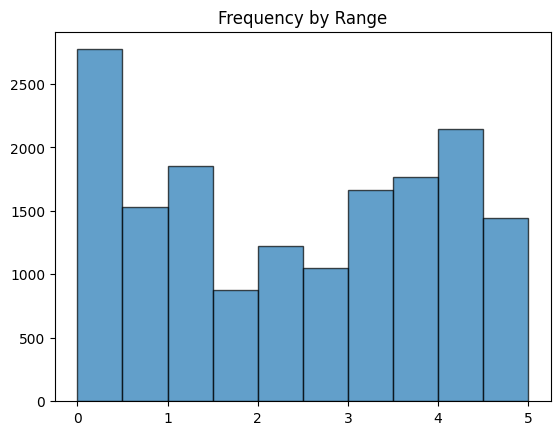

In [105]:
import numpy as np
import matplotlib.pyplot as plt

frequencies = list(dataset['label'].values)

# 히스토그램으로 빈도수 분포를 시각화 (bin 설정 가능)
bins = np.arange(1, max(frequencies) + 2, 0.5) - 1  # 빈도를 기준으로 bin을 설정
print(bins)
plt.hist(frequencies, bins=bins[:-1], edgecolor='black', alpha=0.7)

# 그래프 제목 및 축 라벨 설정
plt.title('Frequency by Range')

# 그래프 표시
plt.show()

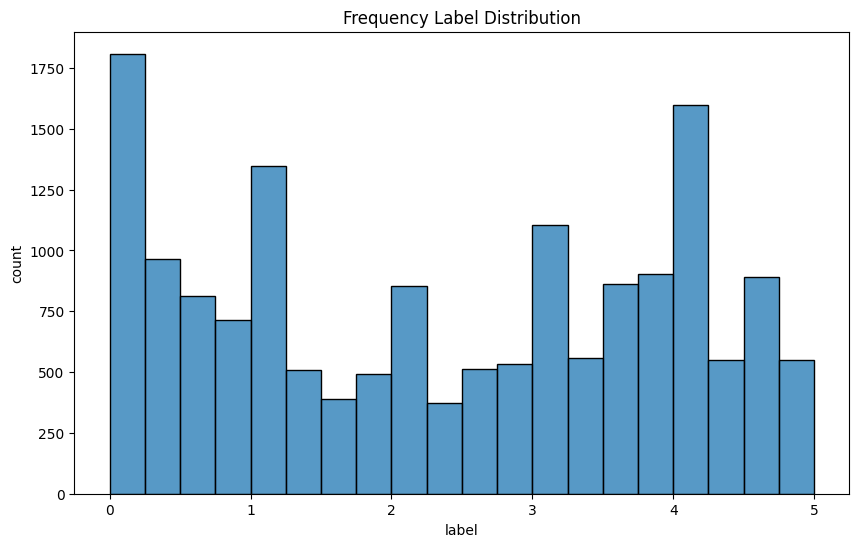

In [106]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(dataset['label'], bins=20)
plt.title("Frequency Label Distribution")
plt.xlabel("label")
plt.ylabel("count")
plt.show()